In [87]:
from vnstock import Vnstock
import pandas as pd
import talib
import mplfinance as mpf

In [112]:
stock = Vnstock().stock(symbol='BVS', source='VCI')
df = stock.quote.history(start='2020-03-30', end='2025-03-30', interval='1D')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['SMA_50'] = talib.SMA(df['close'], timeperiod=50)
df['SMA_200'] = talib.SMA(df['close'], timeperiod=200)
df['EMA_200'] = talib.EMA(df['close'], timeperiod=20)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
df["Upper_BB"], df["Middle_BB"], df["Lower_BB"] = talib.BBANDS(df["close"], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df['RSI_14'] = talib.RSI(df['close'], timeperiod=14)
df.to_csv("BVS_stock_data_with_indicators.csv")
df.head()

,open,high,low,close,volume,SMA_50,SMA_200,EMA_200,MACD,MACD_signal,MACD_hist,Upper_BB,Middle_BB,Lower_BB,RSI_14
time,,,,,,,,,,,,,,,
2020-03-30,6.72,6.72,6.48,6.72,32330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,6.72,6.81,6.40,6.40,52000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,6.64,6.72,6.32,6.56,67900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,6.72,6.97,6.56,6.97,70600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,6.97,7.29,6.97,7.29,40949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


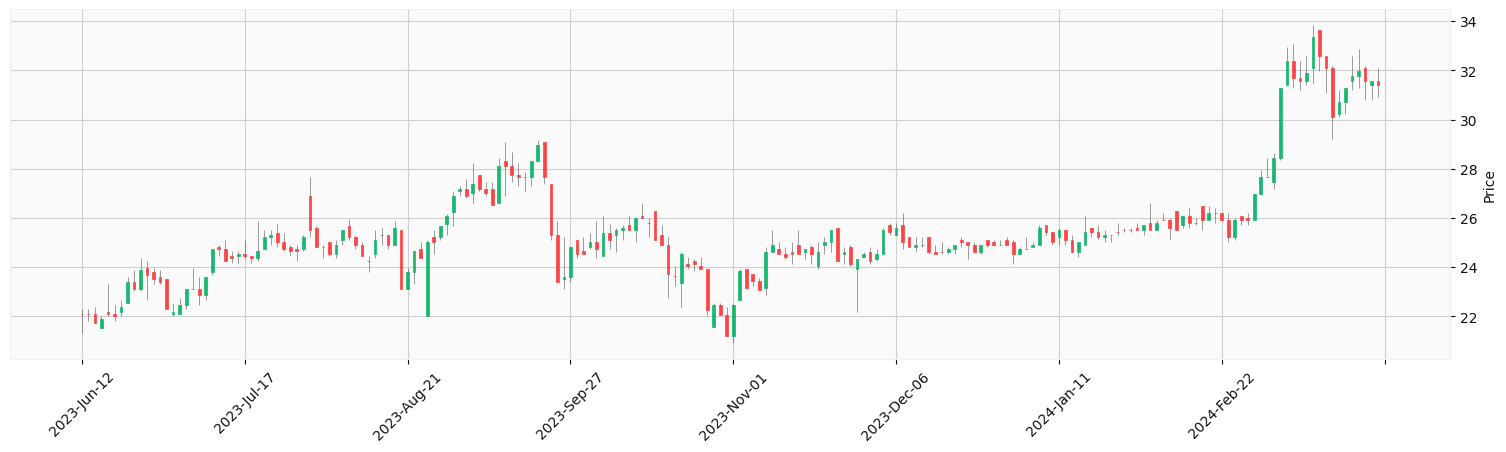

In [121]:
mpf.plot(df.iloc[800:1000], 
         type='candle', 
         style='yahoo', 
         ylabel='Price', 
         volume=False,
         figsize = (20, 5)
)

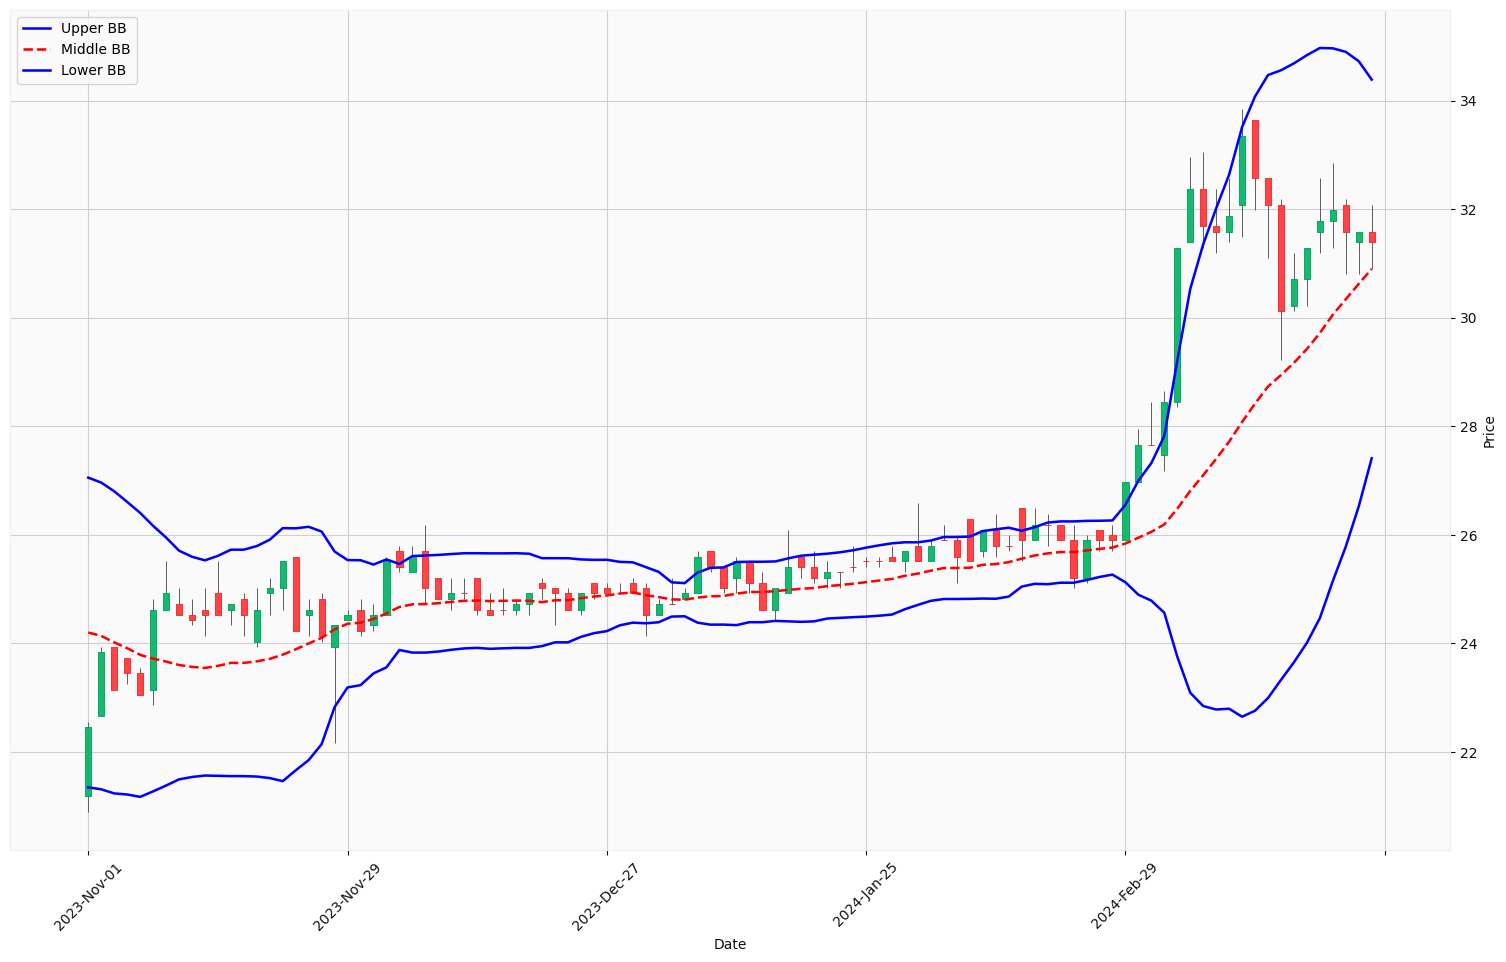

In [124]:
addplots = [
    #mpf.make_addplot(dataframe['SMA_50'].iloc[900:1000], color='blue', label='SMA(50)'),
    #mpf.make_addplot(dataframe['SMA_200'].iloc[900:1000], color='gray', label='SMA(200)'),
    #mpf.make_addplot(dataframe['EMA_20'].iloc[900:1000], color='green', label='EMA(20)'),
    #mpf.make_addplot(dataframe['RSI_14'].iloc[900:1000], color='purple', panel=1, label='RSI(14)'),
    mpf.make_addplot(dataframe['Upper_BB'].iloc[900:1000], color='blue', linestyle='-', label='Upper BB'),
    mpf.make_addplot(dataframe['Middle_BB'].iloc[900:1000], color='red', linestyle='--', label='Middle BB'),
    mpf.make_addplot(dataframe['Lower_BB'].iloc[900:1000], color='blue', linestyle='-', label='Lower BB'),
]
mpf.plot(df.iloc[900:1000], 
         type='candle', 
         style='yahoo', 
         xlabel='Date',
         ylabel='Price', 
         addplot= addplots,
         volume=False,
         figsize =(20,12),
         #panel_ratios=(1, 0.5),
         show_nontrading=False
)

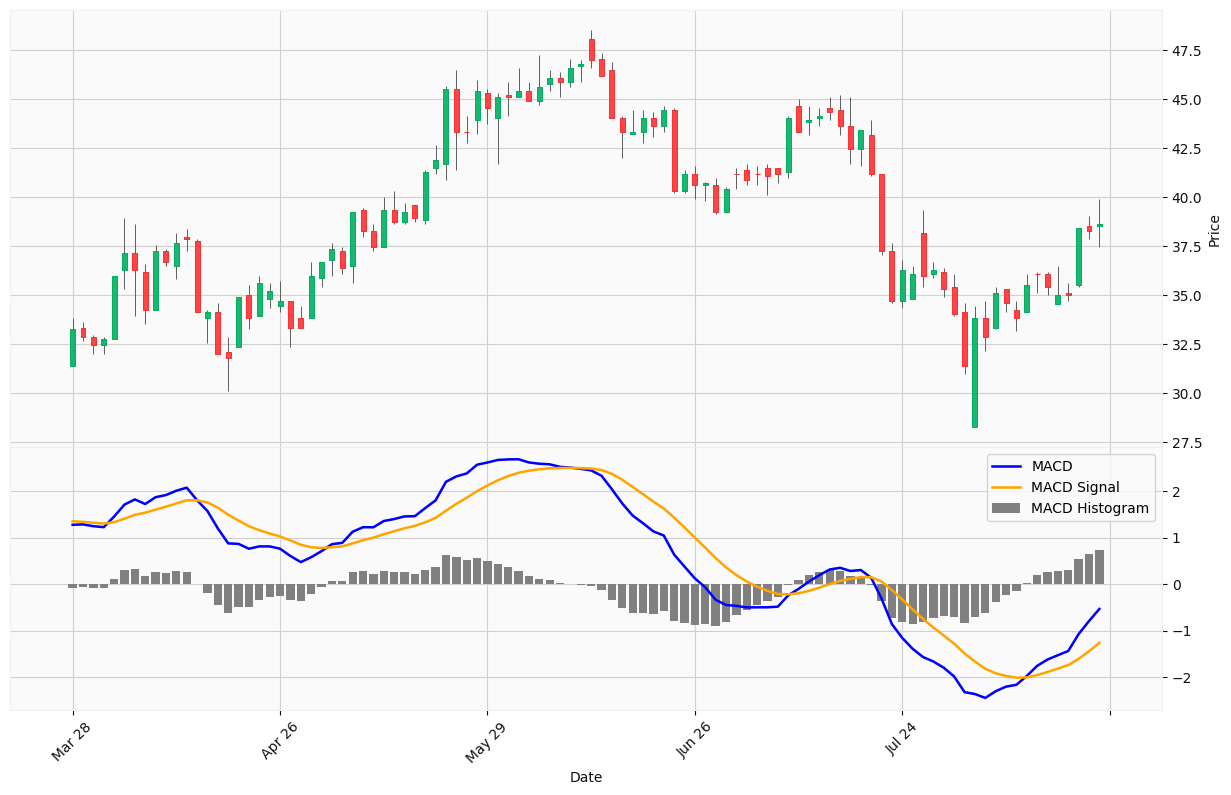

In [123]:
addplots = [
    mpf.make_addplot(df['MACD'].iloc[1000:1100], color='blue', panel=1, label='MACD', secondary_y=False),
    mpf.make_addplot(df['MACD_signal'].iloc[1000:1100], color='orange', panel=1, label='MACD Signal',secondary_y=False),
    mpf.make_addplot(df['MACD_hist'].iloc[1000:1100], type='bar', color='grey', panel=1, label='MACD Histogram', secondary_y=False),
    #mpf.make_addplot([0]*100, color='gray', panel=1, linestyle='--')
]
mpf.plot(df.iloc[1000:1100], 
         type='candle', 
         style='yahoo',
         xlabel='Date', 
         ylabel='Price', 
         addplot=addplots, 
         volume=False,
         figsize = (16, 10),
         panel_ratios=(1, 0.6),
         show_nontrading=False
         )

In [139]:
df['Signal'] = 0
df['Signal'].loc[df.index[200:]]= df['SMA_50'].iloc[200:] > df['SMA_200'].iloc[200:]
df['Position'] = df['Signal'].diff()
#df.to_csv("BVS_stock_data_with_indicators.csv")
df.tail()

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Setti

,open,high,low,close,volume,SMA_50,SMA_200,EMA_200,MACD,MACD_signal,MACD_hist,Upper_BB,Middle_BB,Lower_BB,RSI_14,Signal,Position
time,,,,,,,,,,,,,,,,,
2025-03-24,41.4,41.4,39.7,40.9,826900,36.854,38.94180,39.434614,0.960341,1.029833,-0.069492,41.593653,39.775,37.956347,65.068515,False,0
2025-03-25,41.6,41.6,39.8,40.3,1279900,36.968,38.91275,39.517032,0.913198,1.006506,-0.093308,41.322982,39.930,38.537018,59.468078,False,0
2025-03-26,40.3,40.3,38.9,39.2,1178500,37.052,38.87920,39.486838,0.778106,0.960826,-0.182720,41.242928,39.965,38.687072,50.830338,False,0
2025-03-27,39.2,39.4,38.6,38.7,824600,37.136,38.83970,39.411901,0.623512,0.893363,-0.269851,41.299221,39.935,38.570779,47.456139,False,0
2025-03-28,38.7,39.4,38.2,38.6,820200,37.238,38.79875,39.334577,0.487309,0.812152,-0.324844,41.356172,39.905,38.453828,46.787196,False,0


ValueError: x and y must be the same size

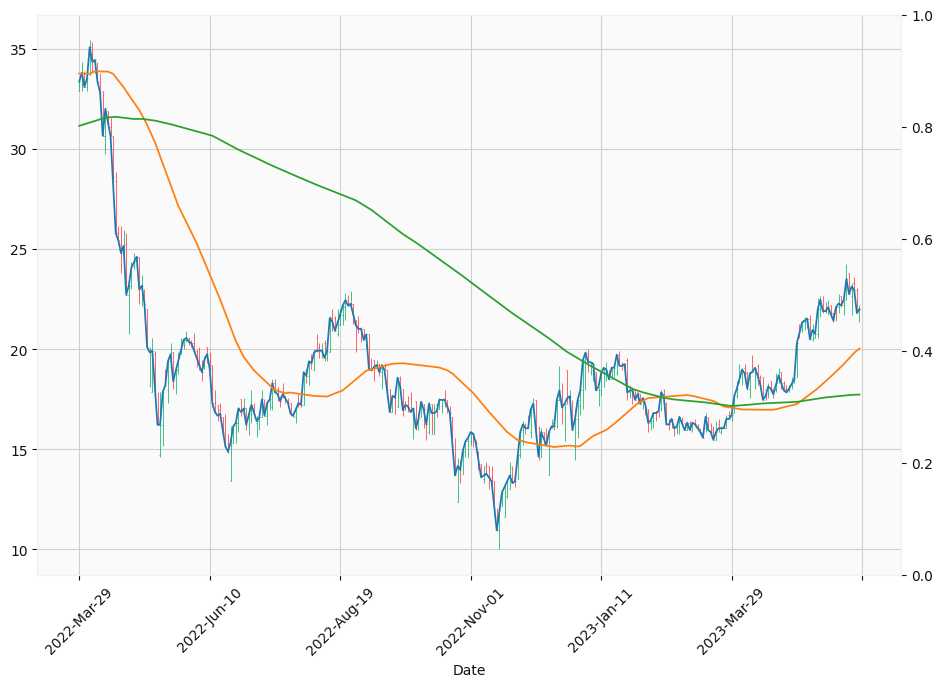

In [141]:
df_plot = df.iloc[500:800].copy()
addplots = [
    mpf.make_addplot(df_plot['close'], label = 'Close Price'),
    mpf.make_addplot(df_plot['SMA_50'], label= 'SMA(50)'),
    mpf.make_addplot(df_plot['SMA_200'], label= 'SMA(200)'),
    mpf.make_addplot(df_plot['SMA_50'][df_plot['Position']== 1], type='scatter', markersize=100, marker = '^', color='green', label='Buy signal'),
    mpf.make_addplot(df_plot['SMA_50'][df_plot['Position']== -1], type='scatter', markersize=100, marker='v', color='red', label='Sell signal'),
]
mpf.plot(df_plot, 
         style='yahoo', 
         xlabel='Date',
         ylabel='Price', 
         addplot=addplots, 
         volume=False,
         figsize = (12, 8),
         show_nontrading=False
         )